## 18.3 Homework

Try different minimization methods in scipy on larger systems ($N$ = 8, 10, 13), and show 
- 1 the average number of attempts to find the ground state (probability plot from above)
- 2 the time costs

N = 13 will take quite some time and that is to be expected

### Optional
try to improve the code to make it run faster, analyze the most time consuming part and give your solution

In [50]:
'''all of the necessary functions are defined below'''

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

#leonard james potential
def LJ(r):
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12 - 1/r6)

#calculate total energy
def totalenergy(pos):
    '''
    pos: a 1D array (3*N) representing positions of the atoms
    example array with 3 atoms:
    [x1, y1, z1
    x2, y2, z2
    x3, y3, z3]
    '''
    E = 0
    atom_amt = int(len(pos)/3)  #number of atoms

    for i in range(atom_amt-1):
        for j in range(i+1, atom_amt):
            atom1 = pos[i*3:(i+1)*3]
            atom2 = pos[j*3:(j+1)*3]
            dist = np.linalg.norm(atom1-atom2)
            E += LJ(dist)
    return E 

#finding the energy w/ optimization
def optim_energy(N, N_attempts=300):
    energy_val = []
    pos_val = []

    for i in range(N_attempts):
        res = minimize(totalenergy, pos, method='L-BFGS-B', tol=1e-4)
        energy_val.append(res.fun)
        pos_val.append(res.x)
        print('\r Step: {:d} out of {:d}; values: {:.4f}'.format(i, N_attempts, res.fun), flush=True, end='')
    return energy_val, pos_val

In [52]:
'''getting the initial positions for N = 8, 10, 13'''

import requests

def get_pos_from_url(address='http://doye.chem.ox.ac.uk/jon/structures/LJ/points/', N=7):
    url_address = address + str(N)
    data_str = requests.get(url_address).text
    return parse_url_text(data_str)

def parse_url_text(data_str):
    x_array = []
    text = data_str.split('\n')
    for line in text:
        [x_array.append(float(i)) for i in line.split()]
    return np.array(x_array)    

import time

 Step: 299 out of 300; values: -19.8215

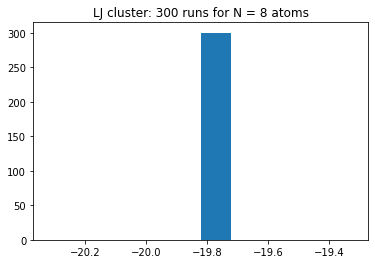

global minimum energy: -19.82148919196902   time: 51.87763452529907 sec


In [49]:
#N=8; ground state energy = -19.821489 eV
pos = get_pos_from_url(N=8)
N = 8
N_attempts = 300
time1 = time.time()
energy_val, pos_val = optim_energy(N) #, N_attempts)
time2 = time.time()
dTime = time2 - time1

plt.title('LJ cluster: ' + str(N_attempts) + ' runs for N = ' + str(N) +' atoms')
plt.hist(energy_val)
plt.show()
print('global minimum energy:', min(energy_val), '  time:', dTime, 'sec')

#trial 1: google colab says this took 13 min with CG method, -19.8215 eV
#trial 2: L-BFGS-B method, -19.8215 eV, 11.99 sec
#trial 3: powell method, -19.8215 eV, 42.81 sec
#trial 4: BFGS method, -19.8215 eV, 51.88 sec

 Step: 299 out of 300; values: -28.4225

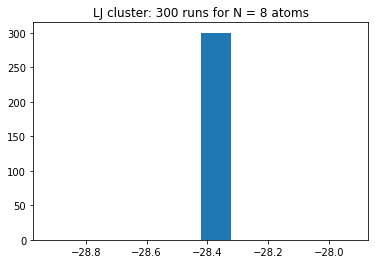

global minimum energy:  -28.422531893437565 time : 8.822447538375854  sec


In [51]:
#N=10; ground state energy = -28.422532 eV
pos = get_pos_from_url(N=10)
N = 8
N_attempts = 300
time1 = time.time()
energy_val, pos_val = optim_energy(N) #, N_attempts)
time2 = time.time()
dTime = time2 - time1

plt.title('LJ cluster: ' + str(N_attempts) + ' runs for N = ' + str(N) +' atoms')
plt.hist(energy_val)
plt.show()
print('global minimum energy:', min(energy_val), '  time:', dTime, 'sec')

 Step: 299 out of 300; values: -44.3268

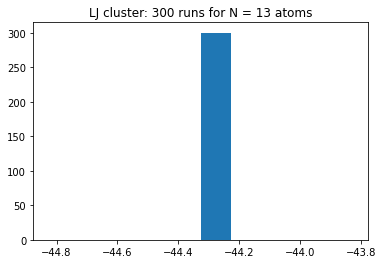

global minimum energy: -44.32680141930676   time: 57.01370978355408 sec


In [53]:
#N=13; ground state energy = -44.326801 eV
pos = get_pos_from_url(N=13)
N = 13
N_attempts = 300
time1 = time.time()
energy_val, pos_val = optim_energy(N) #, N_attempts)
time2 = time.time()
dTime = time2 - time1

plt.title('LJ cluster: ' + str(N_attempts) + ' runs for N = ' + str(N) +' atoms')
plt.hist(energy_val)
plt.show()
print('global minimum energy:', min(energy_val), '  time:', dTime, 'sec')